<a href="https://colab.research.google.com/github/libra3910/diveintocode-ml/blob/master/sprint_machine_learning_scratch_clastering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sprint機械学習スクラッチ　クラスタリング

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
class ScratchKMeans():
    """
    K-meansのスクラッチ実装
    Parameters
    ----------
    n_clusters : int
      クラスタ数
    n_init : int
      中心点の初期値を何回変えて計算するか
    max_iter : int
      1回の計算で最大何イテレーションするか
    tol : float
      イテレーションを終了する基準となる中心点と重心の許容誤差
    verbose : bool
      学習過程を出力する場合はTrue
    """
    def __init__(self, n_clusters, n_init, max_iter, tol, verbose=False):
        # ハイパーパラメータを属性として記録
        self.n_clusters = n_clusters
        self.n_init = n_init
        self.max_iter = max_iter
        self.tol = tol
        self.verbose = verbose
        
        # インスタンス変数
        self.cluster_centers = None          # クラスターごとの中心点
        self.best_sse = None                 # 初期化から繰り返した後の最良のSSE
        self.best_cluster_centers = None     # 初期化から繰り返した後の最良のSSEの時の中心点

    # 【問題１】中心点の初期値を決める
    def _cluster_center_init(self, X):
        """ 変数説明
            X : 特徴量
            self.cluster_centers : 中心点の初期値
        """
        a = 0
        b = X.shape[0]-1
        ns = []
        while len(ns) < self.n_clusters:        # クラスターごとに初期値を求める
            n = random.randint(a, b)
            if not n in ns:
                ns.append(n)
        self.cluster_centers = X[ns]

        return self.cluster_centers

    # 【問題２】SSEを求める関数の作成
    def _output_sse(self, distance_matrix_cluster):
        """ 変数説明

        sse :クラスタ内誤差平方和（SSE, Sum of Squared Errors）

        """
        sse = np.sum(distance_matrix_cluster[:,0])
        
        return sse

    # 【問題３】クラスタへの割り当て
    def _assign_cluster(self, X):
        """ 変数説明

        distance_matrix : 各中心点までの距離を、全要素分格納
        distance_matrix_cluster: distance_matrixに距離が最小値になるindexを追加

        """
        distance_matrix = np.zeros((X.shape[0], self.n_clusters))
        
        distance_matrix_cluster = np.array([])
        for j in range(X.shape[0]):
            for i in range(self.n_clusters):
                diff = self.cluster_centers[i] - X[j]
                distance_matrix[j][i] = np.linalg.norm(diff, ord=2)
            tmp = np.append(distance_matrix[j][np.argmin(distance_matrix[j])], np.argmin(distance_matrix[j]))
            distance_matrix_cluster = np.append(distance_matrix_cluster, tmp)
        distance_matrix_cluster = distance_matrix_cluster.reshape(-1, 2)

        return distance_matrix_cluster

    # 【問題７】クラスタへの割り当て
    def _predict_assign_cluster(self, X):
        """ 変数説明

        distance_matrix : 各中心点までの距離を、全要素分格納
        distance_matrix_cluster: distance_matrixに距離が最小値になるindexを追加

        """
        distance_matrix = np.zeros((X.shape[0], self.n_clusters))
        
        distance_matrix_cluster = np.array([])
        for j in range(X.shape[0]):
            for i in range(self.n_clusters):
                diff = self.best_cluster_centers[i] - X[j]
                distance_matrix[j][i] = np.linalg.norm(diff, ord=2)
            tmp = np.append(distance_matrix[j][np.argmin(distance_matrix[j])], np.argmin(distance_matrix[j]))
            distance_matrix_cluster = np.append(distance_matrix_cluster, tmp)
        distance_matrix_cluster = distance_matrix_cluster.reshape(-1, 2)

        return distance_matrix_cluster
    
    # 【問題4】中心点の移動
    def _update_cluster_center(self, X, distance_matrix_cluster):
        """ 変数説明
  
        X_distance_cluster: distance_matrix_clusterに、X（特徴量）を追加

        """
        X_distance_cluster = np.concatenate([X, distance_matrix_cluster], axis=1)
        for i in range(self.n_clusters):
            for j in range(X.shape[1]):
                self.cluster_centers[i][j] = np.mean(X_distance_cluster[:,j][X_distance_cluster[:,-1] == i])

        return self.cluster_centers, X_distance_cluster

    # 更新した中心点と更新前の中心点の差分を合計
    def _save_distance_of_cluster(self, cluster_centers_bfr):
        """ 変数説明
  
        diff_of_clusters: 更新した中心点と更新前の中心点の差分

        """
        diff_of_clusters = np.array(self.cluster_centers - cluster_centers_bfr)
        diff_of_clusters_distance = np.linalg.norm(diff_of_clusters, ord=2)

        return diff_of_clusters_distance

    def fit(self, X):
        """
        K-meansによるクラスタリングを計算
        Parameters
        ----------
        X : 次の形のndarray, shape (n_samples, n_features)
            訓練データの特徴量
        """

        # 【問題６】 異なる初期値で計算
        # 以下の条件の場合、繰り返しを終了し、最良のsseの中心点を確定する
        # 繰り返しが指定した回数（n_init）に到達する。

        self.best_sse = 0
        for j in range(1, self.n_init+1):
        
            # 【問題１】中心点の初期値を決める
            self.cluster_centers = self._cluster_center_init(X)
            #if self.verbose:
                #verboseをTrueにした際は学習過程を出力。中心点とXをプロット。
                #print("初期中心点={}".format(self.cluster_centers))
                #plt.scatter(X[:,0],X[:,1], c="blue")
                #plt.scatter(self.cluster_centers[:,0], self.cluster_centers[:,1], c="yellow")
                #plt.show()

            # 【問題5】繰り返し
            # 以下の条件の場合、繰り返しを終了し、中心点を確定する。
            # 繰り返しが指定した回数（max_iter）に到達する。
            # 中心点と重心の差の合計が指定した許容値（tol）以下になる。

            i = 1
            diff_of_clusters_distance = self.tol + 1
            last_sse = 0
            while (i < self.max_iter+1) and (diff_of_clusters_distance > self.tol):

                # 中心点を保存しておく
                cluster_centers_bfr = np.array(self.cluster_centers)

                # 【問題３】クラスタへの割り当て
                distance_matrix_cluster = self._assign_cluster(X) 

                # 【問題２】SSEを求める関数の作成
                sse = self._output_sse(distance_matrix_cluster)
        
                # 【問題4】中心点の移動
                self.cluster_centers, X_distance_cluster = self._update_cluster_center(X, distance_matrix_cluster)
        
                # 更新前後の中心点の差を求める
                diff_of_clusters_distance = self._save_distance_of_cluster(cluster_centers_bfr)
        
                #if self.verbose:
                    #print("{}回目の{}回目:sse={}".format(j,i,sse))

                i += 1

            last_sse = sse
        
            #if self.verbose:
                #print("最終中心点={}".format(last_sse))
                #colorlist = ["r", "g", "b", "c", "m", "y", "k", "w","orange","gold"]
                #for i in range(self.n_clusters):
                    #plt.scatter(X_distance_cluster[:,0][X_distance_cluster[:,-1]==i],\
                                #X_distance_cluster[:,1][X_distance_cluster[:,-1]==i], c=colorlist[i])
                    #plt.scatter(self.cluster_centers[:,0], self.cluster_centers[:,1], c="yellow")
                #plt.show()
                
            if j == 1:
                self.best_sse = sse
                self.best_cluster_centers = self.cluster_centers
            elif self.best_sse > sse:
                self.best_sse = sse
                self.best_cluster_centers = self.cluster_centers

        if self.verbose:
            print("初期化繰り返し後の最終中心点={},sse={}".format(self.best_cluster_centers, self.best_sse))
            colorlist = ["r", "g", "b", "c", "m", "y", "k", "w","orange","gold"]
            for i in range(self.n_clusters):
                plt.scatter(X_distance_cluster[:,0][X_distance_cluster[:,-1]==i],\
                            X_distance_cluster[:,1][X_distance_cluster[:,-1]==i], c=colorlist[i])
                plt.scatter(self.cluster_centers[:,0], self.cluster_centers[:,1], c="yellow")
            plt.show()

    def predict(self, X):
        """
        入力されたデータがどのクラスタに属するかを計算
        """
        distance_matrix_cluster = self._predict_assign_cluster(X)
        X_distance_cluster = np.concatenate([X, distance_matrix_cluster], axis=1)
        
        return X_distance_cluster

    def elbow(self, X, try_count):
        """
        入力されたデータに基づいて、クラスター数に対するSSEの推移を可視化する

        try_count : 試行回数
        """
        elb_best_sse = []
        
        for cluster in range(1, try_count):
            elb = ScratchKMeans(n_clusters = cluster, n_init = 10, max_iter = 10, tol = 0.0, verbose=True)
            elb.fit(X)
            print("self.best_sse={}".format(elb.best_sse))
            elb_best_sse.append(elb.best_sse)
        X1 = np.arange(1, try_count, 1)
        X2 = np.array(elb_best_sse)
        print("X1={},X2={}".format(X1,X2))
        plt.scatter(X1,X2, c="yellow")
        plt.plot(X1,X2, C="blue")
    def silhouette(self, X):
        """
        入力されたデータに基づいて、クラスター数に対するシルエット係数を可視化する
        
        coheision_cluster: 凝集度
        divergence_cluster: 乖離度
        an: クラスター内の各点との距離
        sb: クラスター間の各点との距離
        """

        distance_matrix_cluster = self._assign_cluster(X)
        X_distance_cluster = np.concatenate([X, distance_matrix_cluster], axis=1)

        # 凝集度(an）を求める
        coheision_cluster = np.zeros(((X.shape[0]), 2))
        idx = 0
        for i in range(self.n_clusters):
            tmp = X_distance_cluster[:,0:X.shape[1]][X_distance_cluster[:,-1]==i]
            for j in range(len(tmp)):
                an = 0
                for k in range(len(tmp)):
                    diff = tmp[j] - tmp[k]
                    an += np.linalg.norm(diff, ord=2)
                coheision_cluster[idx][0] = an / len(tmp)
                coheision_cluster[idx][1] = i
                idx += 1        

        # 乖離度(ab）を求める
        divergence_cluster = np.zeros(((X.shape[0]), 2))
        idx = 0
        for i in range(self.n_clusters):
            tmp1 = X_distance_cluster[:,0:X.shape[1]][X_distance_cluster[:,-1]==i]
            for j in range(len(tmp1)):
                abs = np.zeros(self.n_clusters-1)
                abs_min = 0
                for k in range(self.n_clusters):
                    ab = 0
                    tmp2 = X_distance_cluster[:,0:X.shape[1]][X_distance_cluster[:,-1]==k]
                    if not (i==k):
                        for l in range(len(tmp2)):
                            diff = tmp1[j] - tmp2[l]
                            ab += np.linalg.norm(diff, ord=2)        
                        abs = ab / len(tmp2)
                        if (i == 0 and k == 1) or (i != 0 and k == 0):
                            abs_min = abs
                        elif (abs_min > abs):
                            abs_min = abs
                divergence_cluster[idx][0] = abs_min
                divergence_cluster[idx][1] = i
                idx += 1
        
        #return coheision_cluster, divergence_cluster
        from matplotlib import cm
        y_ax_lower, y_ax_upper = 0, 0
        yticks = []
        
        cluster_labels = np.arange(self.n_clusters)        # クラスター数分のラベルを作成する。
        silhouette_vals = []
        k=0
        for k in range(len(divergence_cluster)):
            sn = np.abs(divergence_cluster[k][0] - coheision_cluster[k][0]) / np.max([divergence_cluster[k][0], coheision_cluster[k][0]])
            silhouette_vals.append([sn, divergence_cluster[k][1].astype(int)])
        silhouette_vals = np.array(silhouette_vals)
        for i, c in enumerate(cluster_labels):             # クラスター数分処理する。
            c_silhouette_vals = silhouette_vals[silhouette_vals[:,1] == c] # シルエット係数の配列を、クラスターごとに格納する。
            c_silhouette_vals = c_silhouette_vals[:,0]
            silhouette_avg = np.mean(c_silhouette_vals)    # シルエット係数の配列の平均値を求める。
            #print("c_silhouette_vals={},silhouette_avg={}".format(c_silhouette_vals,silhouette_avg))
            c_silhouette_vals.sort()                       # シルエット係数の配列をソートする。
            y_ax_upper += len(c_silhouette_vals)           # シルエット係数の長さ分、上限に加算する。
            color = cm.jet(i / self.n_clusters)                 # 描画する色を決定する。
            plt.barh(range(y_ax_lower, y_ax_upper), c_silhouette_vals, height=1.0, edgecolor='none', color=color)
            yticks.append((y_ax_lower + y_ax_upper) / 2)   # 上限と下限の平均をとる。
            y_ax_lower += len(c_silhouette_vals)           # シルエット係数の長さ分、下限に加算する。
        plt.axvline(silhouette_avg, color="red", linestyle="--")
        plt.yticks(yticks, cluster_labels + 1)
        plt.ylabel('Cluster')
        plt.xlabel('Silhouette coefficient')
        plt.show()

In [ ]:
# シンプルデータセット3の読み込み

from sklearn.datasets import make_blobs
X, _ = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=0.5, shuffle=True, random_state=0)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(X, test_size = 0.25, random_state = 42)

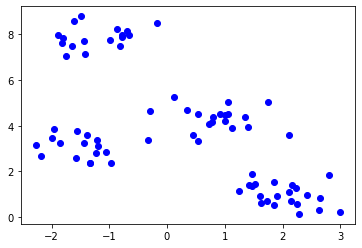

In [ ]:
plt.scatter(X_train[:,0], X_train[:,1], c="blue")

In [ ]:
kms = ScratchKMeans(n_clusters = 4, n_init = 10, max_iter = 10, tol = 0.0, verbose=True)

初期化繰り返し後の最終中心点=[[ 0.88312196  4.32175244]
 [-1.21402055  7.9007905 ]
 [-1.46297494  3.07467781]
 [ 2.01674893  0.98169361]],sse=46.48716405221856


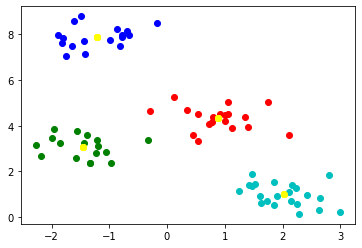

In [ ]:
kms.fit(X_train)

In [ ]:
# 【問題7】推定
pred = kms.predict(X_test)

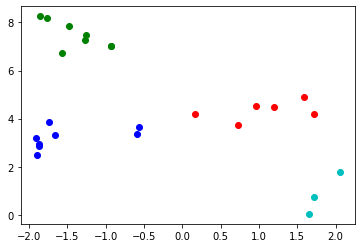

In [ ]:
colorlist = ["r", "g", "b", "c", "m", "y", "k", "w", "p", "orange","gold"]
for i in range(4):
    plt.scatter(pred[:,0][pred[:,-1]==i],\
                pred[:,1][pred[:,-1]==i], c=colorlist[i])
    #plt.scatter(self.cluster_centers[:,0], self.cluster_centers[:,1], c="yellow")
plt.show()

初期化繰り返し後の最終中心点=[[0.20851827 3.87058023]],sse=200.70491451830694


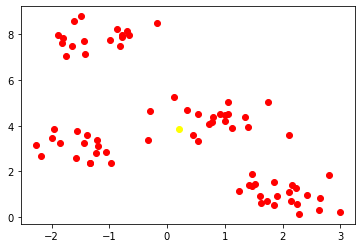

self.best_sse=200.70491451830694
初期化繰り返し後の最終中心点=[[ 0.62546931  2.6893117 ]
 [-1.21402055  7.9007905 ]],sse=130.22352298021093


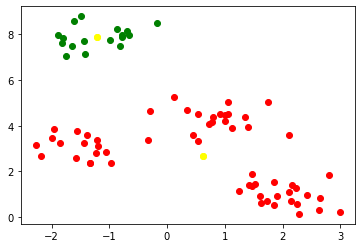

self.best_sse=130.22352298021093
初期化繰り返し後の最終中心点=[[-0.22475713  3.73285609]
 [-1.21402055  7.9007905 ]
 [ 2.01674893  0.98169361]],sse=76.072406517603


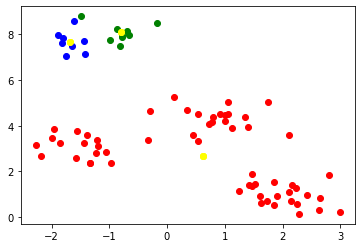

self.best_sse=76.072406517603
初期化繰り返し後の最終中心点=[[ 2.01674893  0.98169361]
 [-1.21402055  7.9007905 ]
 [-1.46297494  3.07467781]
 [ 0.88312196  4.32175244]],sse=46.48716405221856


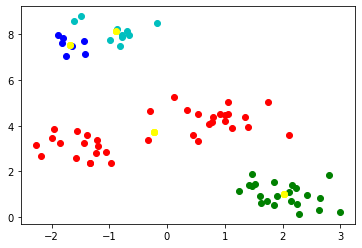

self.best_sse=46.48716405221856
初期化繰り返し後の最終中心点=[[ 0.88312196  4.32175244]
 [-1.65431717  7.80797619]
 [ 2.01674893  0.98169361]
 [-0.71868685  8.0052066 ]
 [-1.46297494  3.07467781]],sse=42.4167706601646


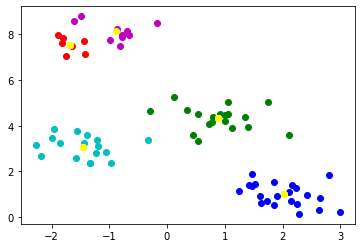

self.best_sse=42.4167706601646
初期化繰り返し後の最終中心点=[[ 0.88312196  4.32175244]
 [-1.68193504  7.55208463]
 [ 2.2581232   0.5503933 ]
 [-1.46297494  3.07467781]
 [-0.88648041  8.14488462]
 [ 1.81560371  1.34111053]],sse=39.11760759949247


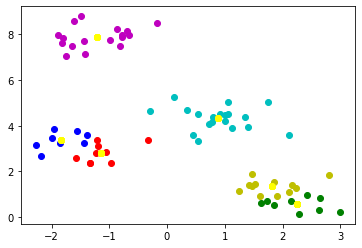

self.best_sse=39.11760759949247


C:\Users\es\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3372: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
C:\Users\es\anaconda3\lib\site-packages\numpy\core\_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


初期化繰り返し後の最終中心点=[[ 1.79608714  1.24413273]
 [-1.68193504  7.55208463]
 [-0.88648041  8.14488462]
 [ 2.40290707  0.52242514]
 [-1.76058788  3.37778717]
 [-1.12816039  2.73367979]
 [ 0.88312196  4.32175244]],sse=36.18902679682381


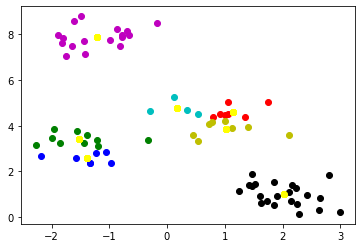

self.best_sse=36.18902679682381
初期化繰り返し後の最終中心点=[[ 1.00594821  4.41097077]
 [ 0.08720359  3.73197152]
 [ 1.79608714  1.24413273]
 [ 2.40290707  0.52242514]
 [-1.38343608  2.57782758]
 [-1.65431717  7.80797619]
 [-1.6501322   3.42606753]
 [-0.71868685  8.0052066 ]],sse=34.208449509453516


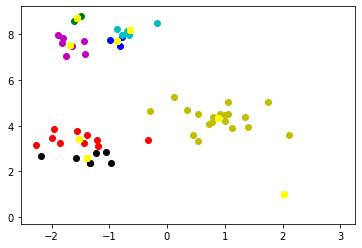

self.best_sse=34.208449509453516
初期化繰り返し後の最終中心点=[[ 2.40290707  0.52242514]
 [-1.55765464  8.70359668]
 [-1.68193504  7.55208463]
 [ 0.21634639  3.43242982]
 [-1.35935115  2.64580078]
 [-0.71868685  8.0052066 ]
 [ 1.79608714  1.24413273]
 [-1.70755415  3.46412432]
 [ 0.9291145   4.42388994]],sse=32.123523948111284


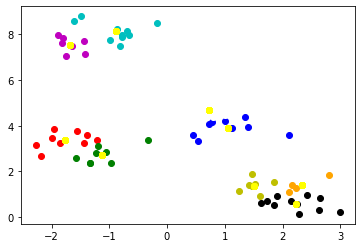

self.best_sse=32.123523948111284
X1=[1 2 3 4 5 6 7 8 9],X2=[200.70491452 130.22352298  76.07240652  46.48716405  42.41677066
  39.1176076   36.1890268   34.20844951  32.12352395]


<ipython-input-2-12f0dacb64e6>:234: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(X1,X2, C="blue")


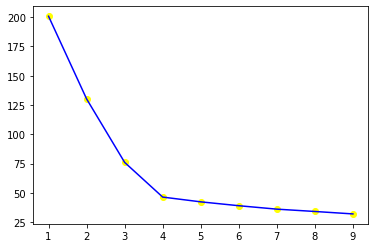

In [ ]:
# 【問題8】エルボー法の実装
kms.elbow(X_train, 10)

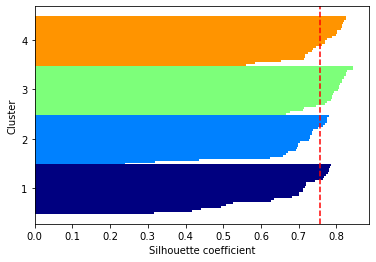

In [ ]:
# 【問題９】 シルエット法
kms.silhouette(X)

## 卸売業者のデータの読み込み

In [ ]:
import pandas as pd
data_dir = 'C:/Users/es/Documents/Python Scripts/2.Feb/Week4/clustering/'
data = pd.read_csv(f'{data_dir}Wholesale customers data.csv')

[0.45961362 0.86478588 0.93481596 0.97883941 0.99386152 1.        ]


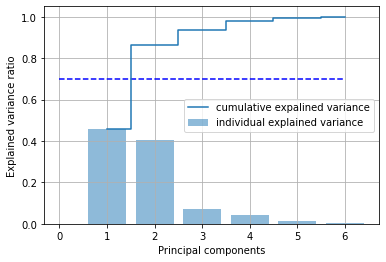

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
pca = PCA(n_components=6)
pca = pca.fit(data)
var_exp = pca.explained_variance_ratio_
cum_var_exp = np.cumsum(var_exp)
print(cum_var_exp)
plt.bar(range(1,7), var_exp, alpha=0.5, align='center', label='individual explained variance')
plt.step(range(1,7), cum_var_exp, where='mid', label='cumulative expalined variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.hlines(0.7, 0, 6,  "blue", linestyles='dashed')
plt.legend(loc='best')
plt.grid()
plt.show()

主成分=1でほぼ40%以上を占める。主成分=2までで80%以上を占める。
そのため、2次元まで削減することとする。

In [ ]:
pca = PCA(n_components = 2)
pca = pca.fit(data)
data_pca = pca.transform(data)

In [ ]:
data_pca.shape

(440, 2)

In [ ]:
# 【問題10】クラスタ数kの選択

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test = train_test_split(data_pca, test_size = 0.25, random_state = 42)

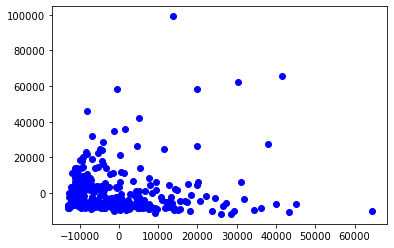

In [ ]:
plt.scatter(X_train[:,0], X_train[:,1], c="blue")

初期化繰り返し後の最終中心点=[[18252.65378312 -5053.47868827]
 [14526.87610893 50607.64138411]
 [-6400.29078915 11417.17717593]
 [-4456.9846758  -5017.43482768]],sse=2475107.133669906


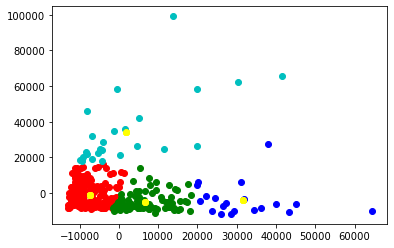

In [ ]:
kms2 = ScratchKMeans(n_clusters = 4, n_init = 10, max_iter = 10, tol = 0.0, verbose=True)
kms2.fit(X_train)

初期化繰り返し後の最終中心点=[[-245.01476272  316.52921677]],sse=4449153.908193976


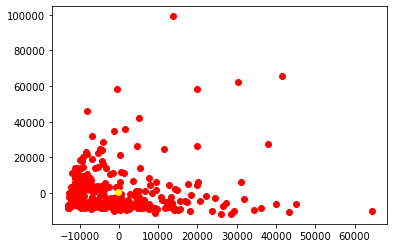

self.best_sse=4449153.908193976
初期化繰り返し後の最終中心点=[[-4640.21733323 -1295.19604183]
 [18382.27232182  7147.17436035]],sse=3647642.471477049


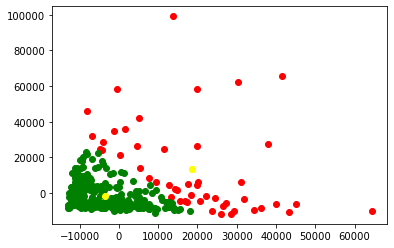

self.best_sse=3647642.471477049
初期化繰り返し後の最終中心点=[[14840.52144971 -5061.76892091]
 [-6036.13795064 -2002.03343129]
 [ 2991.95030398 32716.75200107]],sse=2901001.916490829


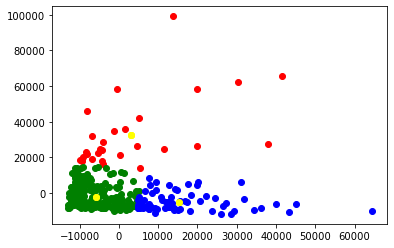

self.best_sse=2901001.916490829
初期化繰り返し後の最終中心点=[[-4608.69168035 -4996.84077366]
 [14526.87610893 50607.64138411]
 [-6494.04817383 11530.58687634]
 [17680.02528989 -4974.37708095]],sse=2462920.584928222


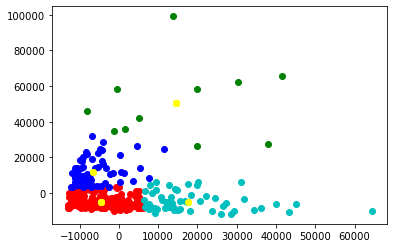

self.best_sse=2462920.584928222
初期化繰り返し後の最終中心点=[[-6871.82401173  9614.15247531]
 [-6337.68031086 -5368.57367153]
 [10085.85223239 47101.79849959]
 [ 8431.19814092 -5043.10009845]
 [31639.34479462 -3792.45582557]],sse=2100130.708735185


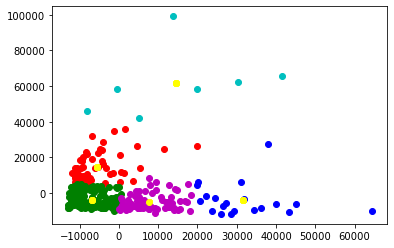

self.best_sse=2100130.708735185
初期化繰り返し後の最終中心点=[[-2433.66736659 25102.53344081]
 [ 7670.19026871 -5091.69074922]
 [-6652.08559948 -5735.18310177]
 [20964.64980803 68819.21774351]
 [-7328.99680919  6207.54377258]
 [31639.34479462 -3792.45582557]],sse=1885272.968235225


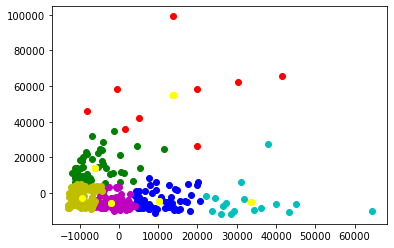

self.best_sse=1885272.968235225
初期化繰り返し後の最終中心点=[[-2.78999581e+03  2.30759788e+04]
 [ 9.46266575e+00 -6.37492568e+03]
 [ 1.16527411e+04 -3.75270976e+03]
 [ 2.09646498e+04  6.88192177e+04]
 [-8.97969587e+03 -5.58060693e+03]
 [ 3.43667731e+04 -5.03179750e+03]
 [-7.43536567e+03  5.35101815e+03]],sse=1697218.4716262366


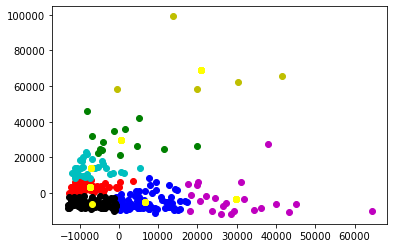

self.best_sse=1697218.4716262366
初期化繰り返し後の最終中心点=[[ 35022.16030191  -5169.23857441]
 [ 20964.64980803  68819.21774351]
 [ -7484.7616197    5607.89216458]
 [ -2675.53770804  22678.05114376]
 [  4524.43907158  -6288.71692148]
 [-10226.30442113  -4985.37966372]
 [ 14387.24308607  -2564.51325495]
 [ -3775.64818462  -6255.23827548]],sse=1538949.1795403352


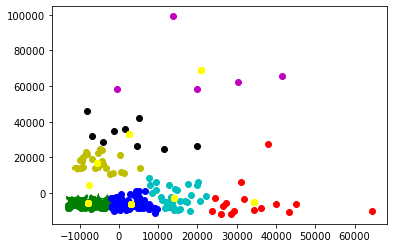

self.best_sse=1538949.1795403352
初期化繰り返し後の最終中心点=[[ 14387.24308607  -2564.51325495]
 [  4607.18535005  -6222.00072911]
 [ 20964.64980803  68819.21774351]
 [ -3666.50341957  -6285.10644894]
 [ -7386.30819573   4750.89950145]
 [ -5841.1868323   16557.29032538]
 [  6023.08404893  32433.79361822]
 [-10181.73611225  -5027.94803069]
 [ 34815.33895155  -7490.7163422 ]],sse=1461575.553409918


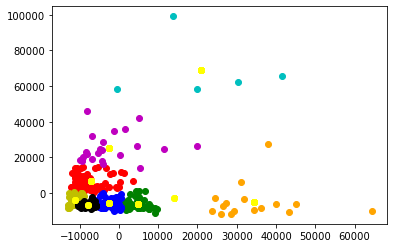

self.best_sse=1461575.553409918
X1=[1 2 3 4 5 6 7 8 9],X2=[4449153.90819398 3647642.47147705 2901001.91649083 2462920.58492822
 2100130.70873519 1885272.96823522 1697218.47162624 1538949.17954034
 1461575.55340992]


<ipython-input-2-12f0dacb64e6>:234: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  plt.plot(X1,X2, C="blue")


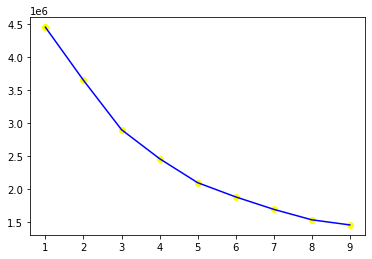

In [ ]:
kms2.elbow(X_train, 10)

なだらかなカーブを描いて下降していくが、クラスタ数=3で若干カーブが下がる。

初期化繰り返し後の最終中心点=[[21811.87240612 -4319.19244748]
 [-4108.06952654 -3509.1740874 ]
 [-1751.31550283 24728.49801216]],sse=2894098.3556511537


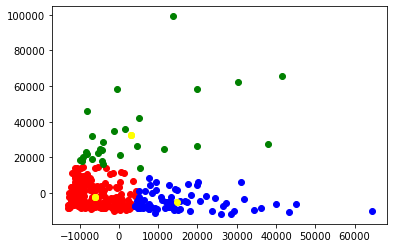

In [ ]:
kms3 = ScratchKMeans(n_clusters = 3, n_init = 10, max_iter = 10, tol = 0.0, verbose=True)
kms3.fit(X_train)

In [ ]:
# 【問題11】既知のグループとの比較

In [ ]:
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [ ]:
data11 = data[(data['Channel'] == 1) & (data['Region'] == 1)]

In [ ]:
ch_re = data['Channel'] * 10 + data['Region']

In [ ]:
import seaborn as sns

C:\Users\es\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

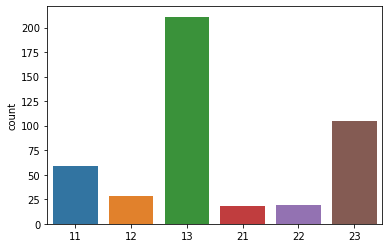

In [ ]:
sns.countplot(ch_re)

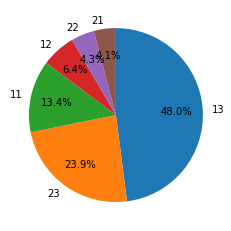

In [ ]:
# チャネル別、地域別売上量の割合
label = ['13','23','11','12','22','21']
 
plt.pie(ch_re.value_counts(),
       labels=label, counterclock=False, startangle=90,
       autopct='%1.1f%%', pctdistance=0.7)
 
plt.show()

売上量は、チャネル＝1、地域=3が全体の48%、チャネル=2、地域=3が全体の23.9%を占めており、残りが28.1%である。

In [ ]:
data_total = data.groupby(['Channel','Region']).sum().sum(axis=1).sort_values(ascending=False)
data_total

Channel  Region
1        3         5742077
2        3         4935522
1        1         1538342
2        1          848471
         2          835938
1        2          719150
dtype: int64

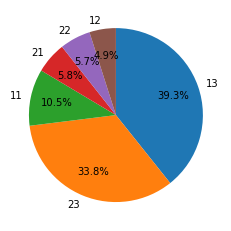

In [ ]:
# チャネル別、地域別売上高の割合
label = ['13','23','11','21','22','12']
 
plt.pie(data_total,
       labels=label, counterclock=False, startangle=90,
       autopct='%1.1f%%', pctdistance=0.7)
 
plt.show()

売上高は、チャネル＝1、地域=3が全体の39.3%、チャネル=2、地域=3が全体の33.8%を占めており、残りが26.9%である。

In [ ]:
data.groupby(['Channel','Region']).sum()

Fresh     Milk  Grocery  Frozen  Detergents_Paper  \
Channel Region                                                        
1       1        761233   228342   237542  184512             56081   
        2        326215    64519   123074  160861             13516   
        3       2928269   735753   820101  771606            165990   
2       1         93600   194112   332495   46514            148055   
        2        138506   174625   310200   29271            159795   
        3       1032308  1153006  1675150  158886            724420   

                Delicassen  
Channel Region              
1       1            70632  
        2            30965  
        3           320358  
2       1            33695  
        2            23541  
        3           191752

Fresh, Frozen, Delicassenについてはチャネル＝1、地域=3がトップだが、Milk,Grocery,Detergents_Paperはチャネル=2、地域=3がであり、\
チャネル＝1、地域=3が売上量がダントツであるが、売上高はチャネル=2、地域=3に追いつかれている要因と思われる。

In [ ]:
data_total_hinmoku = data.groupby(['Channel','Region']).sum().sum().sort_values(ascending=False)
data_total_hinmoku

Fresh               5280131
Grocery             3498562
Milk                2550357
Frozen              1351650
Detergents_Paper    1267857
Delicassen           670943
dtype: int64

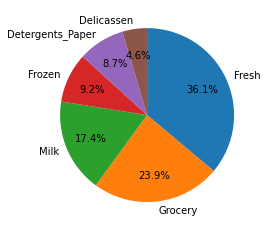

In [ ]:
# 品目別売上高の割合
label = ['Fresh','Grocery','Milk','Frozen','Detergents_Paper','Delicassen']
 
plt.pie(data_total_hinmoku,
       labels=label, counterclock=False, startangle=90,
       autopct='%1.1f%%', pctdistance=0.7)
 
plt.show()

In [ ]:
data.groupby(['Channel','Region']).max()

Fresh   Milk  Grocery  Frozen  Detergents_Paper  Delicassen
Channel Region                                                              
1       1        56083  23527    16966   18711              5828        6854
        2        32717  16784    13626   60869              1679        5609
        3       112151  43950    21042   36534              6907       47943
2       1        20782  28326    39694    8321             19410        6372
        2        27082  25071    67298   11559             38102        3508
        3        44466  73498    92780    8132             40827       16523

売上高の最高をマークした品目について、チャネル別、地域別比較では、Detergents_Paperがチャネル2、地域1,2について、チャネル1,地域3よりも\
売り上げが多かった。

In [ ]:
# 【問題12】卸売業者にとって有益な情報

```py
1.全体の売上量は、チャネル1,地域3が全体の半分を占めるが、売上高については、チャネル2、地域3が迫っている。これはチャネル1,地域3での
　Freshの売上高が圧倒的に高く、これに依存していると考えられる。
2.Detergents_Paperについては、がチャネル2、地域1,2について、チャネル1,地域3よりも売り上げが多い時もあるため、Detergents_Paperが
　売れた要因を調査し対策を講じれば、チャネル2、地域1,2の売上げ上昇が見込めるかもしれない。
3.Freshはチャネル1,地域3の稼ぎ頭となっているため、こちらも売上高が圧倒的に高い要因を調査し、売上げを減らさない対策を講じるべきと
　考える。
4.機械学習でのクラスタリング手法でも、クラスター数=3が推奨されている。これは、売上高が、チャネル1,地域3、チャネル2、地域3、その他で
　ほぼ 同じ割合を占めるためと思われる。従い、チャネル1,地域3、チャネル2、地域3の売上げを減らさず、その他の地域の売り上げを増加させる
 　施策を考えるほうが良いと思われる。
```